In [8]:
!pip install pathos
!pip install wrds
!pip install refinitiv.data

  Obtaining dependency information for numpy<1.27,>=1.26 from https://files.pythonhosted.org/packages/bf/5a/e958ac00a4e3099c01a7813c4fa61c47317f75540f56f57adcb53b37bdea/numpy-1.26.3-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Using cached numpy-1.26.3-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
  Obtaining dependency information for pandas<2.3,>=2.2 from https://files.pythonhosted.org/packages/ee/0d/43c80cc69ad223356b61d12e488acf5f861dc833d498f43869efd871f5c9/pandas-2.2.0-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Using cached pandas-2.2.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (19 kB)
  Obtaining dependency information for scipy<1.13,>=1.12 from https://files.pythonhosted.org/packages/32/48/f605bad3e610efe05a51b56698578f7a98f900513a4bad2c9f12df845cd6/scipy-1.12.0-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Using cached scipy-1.12.0-cp39-cp39-macosx_12_0_arm64.whl.metadata (60 kB)
Using cached numpy-1.26.3-cp39-cp39-macosx_11_0_arm64.whl (14.0 MB)
Using cached pandas-2.2.0-cp39-cp

Using cached pandas-2.0.2-cp39-cp39-macosx_11_0_arm64.whl (10.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.3
    Uninstalling numpy-1.26.3:
      Successfully uninstalled numpy-1.26.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.12.0
    Uninstalling scipy-1.12.0:
      Successfully uninstalled scipy-1.12.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.0
    Uninstalling pandas-2.2.0:
      Successfully uninstalled pandas-2.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
wrds 3.2.0 requires numpy<1.27,>=1.26, but you have numpy 1.23.4 which is incompatible.
wrds 3.2.0 requires pandas<2.3,>=2.2, but you have pandas 2.0.2 which is incompatible.
wrds 3.2.0 requires scipy<1.13,>=1.12, but you have scipy 1.9.3 which is incompatible.
yfinance 0.2.31 requires requests>=2.31, 

In [10]:
from Portfolio import ALL_WEATHER, BERNSTEIN, MVO
from Portfolio import *
from PortfolioConfig import *

# 1. Running example portfolios

In [11]:
all_weather_df = ALL_WEATHER.generate_df()
all_weather_df

,date,snp500,us_bonds,inter_us_bonds,gold,commodities
0,2007-01-11,1423.82,88.45,99.92,60.63,22.65
1,2007-01-12,1430.73,88.04,99.93,62.17,23.18
2,2007-01-16,1431.90,88.20,99.83,61.97,22.65
3,2007-01-17,1430.62,87.96,99.82,62.64,22.85
4,2007-01-18,1426.37,88.23,99.91,62.26,22.61
...,...,...,...,...,...,...
4285,2024-01-22,4850.43,94.65,116.58,187.22,22.03
4286,2024-01-23,4864.60,93.90,116.45,187.95,22.15
4287,2024-01-24,4868.55,93.35,116.26,186.40,22.34
4288,2024-01-25,4894.16,93.96,116.64,187.14,22.51


In [12]:
all_weather_weights = ALL_WEATHER.generate_weights()
all_weather_weights

,snp500,us_bonds,inter_us_bonds,gold,commodities
0,0.3,0.4,0.15,0.075,0.075


In [13]:
all_weather_consolidated = ALL_WEATHER.generate_consolidated()
all_weather_consolidated

,date,all_weather
0,2007-01-11,1695.47
1,2007-01-12,1704.05
2,2007-01-16,1704.55
3,2007-01-17,1703.89
4,2007-01-18,1699.38
...,...,...
4285,2024-01-22,5270.91
4286,2024-01-23,5285.05
4287,2024-01-24,5286.90
4288,2024-01-25,5314.41


In [14]:
bernstein_df = BERNSTEIN.generate_df()
bernstein_df

,date,us_bonds,snp500,foreign_large_cap,us_small_cap
0,2007-07-26,87.03,1482.66,47.90,71.25
1,2007-07-27,87.28,1458.95,47.17,69.60
2,2007-07-30,87.03,1473.91,47.96,70.82
3,2007-07-31,87.66,1455.27,47.90,69.95
4,2007-08-01,87.13,1465.81,48.10,70.31
...,...,...,...,...,...
4150,2024-01-22,94.65,4850.43,46.90,210.66
4151,2024-01-23,93.90,4864.60,46.82,209.92
4152,2024-01-24,93.35,4868.55,47.11,208.29
4153,2024-01-25,93.96,4894.16,47.23,209.83


In [15]:
bernstein_weights = BERNSTEIN.generate_weights()
bernstein_weights

,us_bonds,snp500,foreign_large_cap,us_small_cap
0,0.25,0.25,0.25,0.25


In [16]:
bernstein_consolidated = BERNSTEIN.generate_consolidated()
bernstein_consolidated

,date,bernstein
0,2007-07-26,1688.84
1,2007-07-27,1663.00
2,2007-07-30,1679.72
3,2007-07-31,1660.78
4,2007-08-01,1671.35
...,...,...
4150,2024-01-22,5202.64
4151,2024-01-23,5215.24
4152,2024-01-24,5217.30
4153,2024-01-25,5245.18


In [17]:
mvo_df = MVO.generate_df()
mvo_df

,date,us_bonds,snp500
0,2002-08-02,83.85,864.24
1,2002-08-05,84.22,834.60
2,2002-08-06,83.50,859.57
3,2002-08-07,83.70,876.77
4,2002-08-08,83.70,905.46
...,...,...,...
5408,2024-01-22,94.65,4850.43
5409,2024-01-23,93.90,4864.60
5410,2024-01-24,93.35,4868.55
5411,2024-01-25,93.96,4894.16


In [18]:
mvo_weights = MVO.generate_weights()
mvo_weights

,us_bonds,snp500
0,0.039151,0.960849


In [19]:
mvo_consolidated = MVO.generate_consolidated()
mvo_consolidated

,date,mvo
0,2002-08-02,948.09
1,2002-08-05,918.82
2,2002-08-06,943.07
3,2002-08-07,960.47
4,2002-08-08,989.16
...,...,...
5408,2024-01-22,4945.08
5409,2024-01-23,4958.50
5410,2024-01-24,4961.90
5411,2024-01-25,4988.12


# 2. Using with backtest engine

In [20]:
import sys
sys.path.insert(0, '..')
from backtest.backtest import Backtest

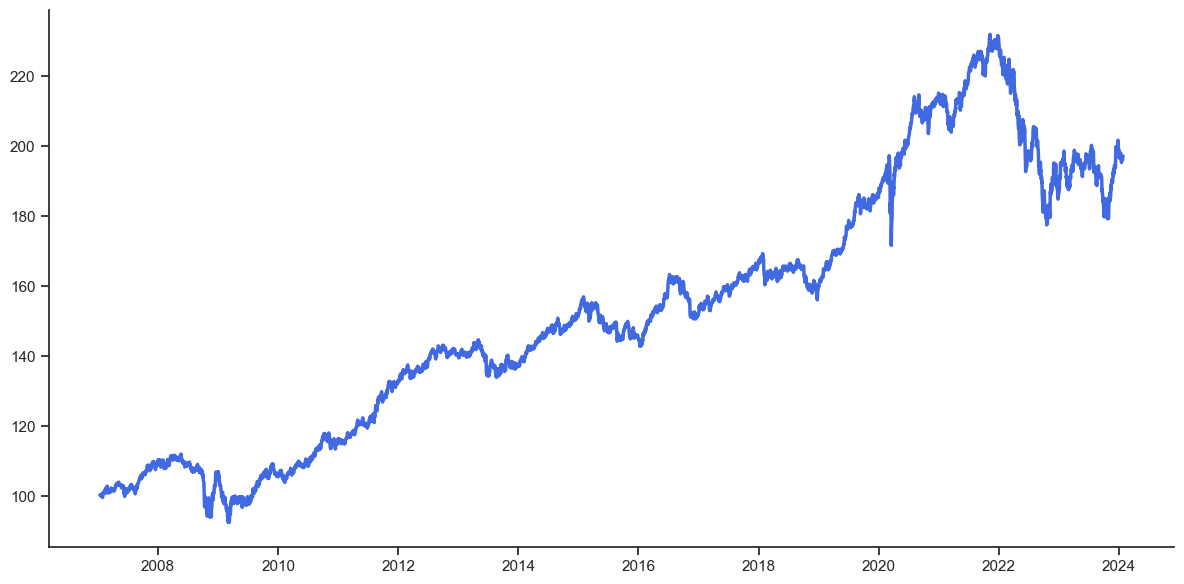

Sharpe Ratio: 0.16820096634141748
Max Drawdown: -0.23465859915173554
PnL: 0.9705288964799212
Beta: nan


In [21]:
# Running all weather with all data.
ALL_WEATHER.backtest(Backtest())

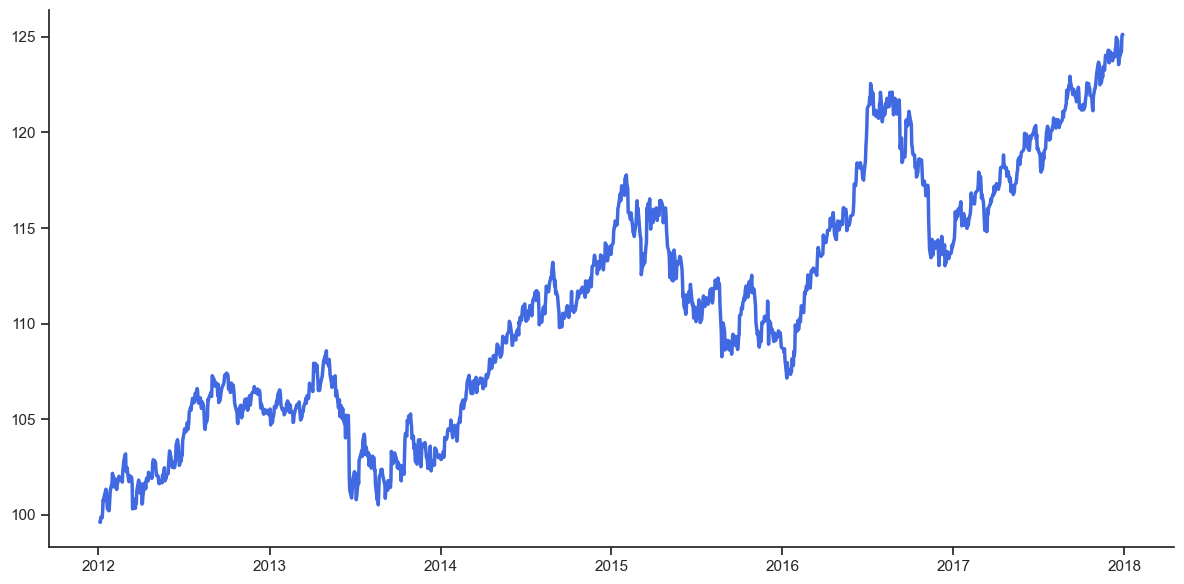

Sharpe Ratio: 0.16432695484325127
Max Drawdown: -0.09030349020109746
PnL: 0.2512301536567594
Beta: nan


In [22]:
# Running all weather with a from 2012 to 2018 only
ALL_WEATHER.backtest(Backtest(), start="2012-01-01", end="2018-01-01")

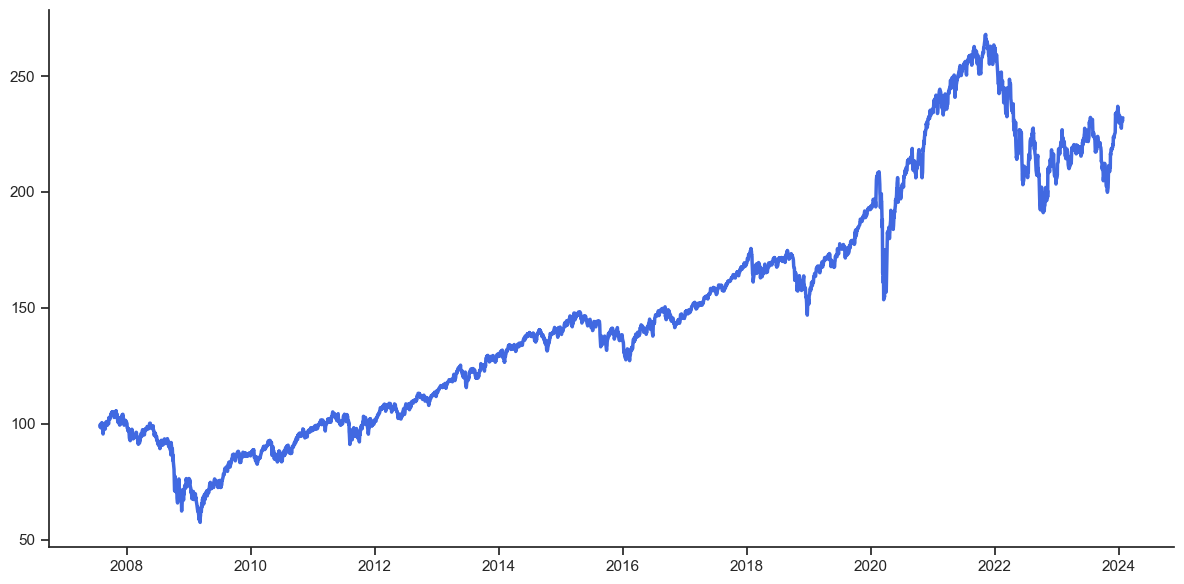

Sharpe Ratio: 0.20748795034626377
Max Drawdown: -0.45637473636137615
PnL: 1.3199844851662088
Beta: nan


In [11]:
BERNSTEIN.backtest(Backtest())

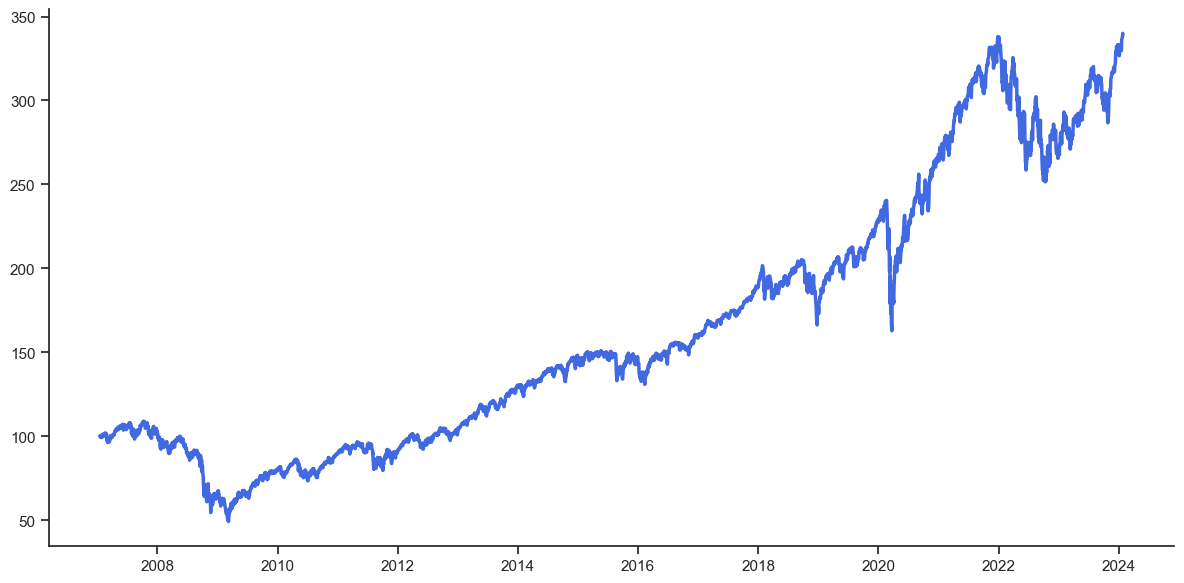

Sharpe Ratio: 0.3000010246911862
Max Drawdown: -0.54755292672808
PnL: 2.3971058357620163
Beta: nan


In [23]:
MVO.backtest(Backtest(), start='2007-01-12', end='2024-01-26')

# 3. using portfolio with WRDS non-downloaded data

In [12]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [13]:
# Create portfolio
test_portfolio = Portfolio(test_config)

In [14]:
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


In [15]:
df1 = test_config.downloaded["GOOG"]
date_series = pd.to_datetime(df1["datadate"])
price = df1["prccd"]
r1 = pd.DataFrame(
        {"date" : date_series, "goog" : price})
df2 = pd.read_csv("../data/snp500.csv")
date_series = pd.to_datetime(df2["datadate"])
price = df2["prccd"]
r2 = pd.DataFrame(
        {"date" : date_series, "snp" : price})

In [16]:
r1

,date,goog
0,2014-03-27,558.46
1,2014-03-28,559.99
2,2014-03-31,556.97
3,2014-04-01,567.16
4,2014-04-02,567.00
...,...,...
2474,2024-01-25,153.64
2475,2024-01-26,153.79
2476,2024-01-29,154.84
2477,2024-01-30,153.05


In [17]:
r1.dtypes

date    datetime64[ns]
goog           float64
dtype: object

In [18]:
r2

,date,snp
0,1984-02-10,156.30
1,1984-02-13,154.95
2,1984-02-14,156.61
3,1984-02-15,156.25
4,1984-02-16,156.13
...,...,...
10096,2024-01-22,4850.43
10097,2024-01-23,4864.60
10098,2024-01-24,4868.55
10099,2024-01-25,4894.16


In [19]:
r2.dtypes

date    datetime64[ns]
snp            float64
dtype: object

## 

In [20]:
base = pd.merge(r1, r2, how = "inner", on = "date")
base.tail(100)

,date,goog,snp
2376,2023-09-05,136.71,4496.83
2377,2023-09-06,135.37,4465.48
2378,2023-09-07,136.20,4451.14
2379,2023-09-08,137.20,4457.49
2380,2023-09-11,137.74,4487.46
...,...,...,...
2471,2024-01-22,147.71,4850.43
2472,2024-01-23,148.68,4864.60
2473,2024-01-24,150.35,4868.55
2474,2024-01-25,153.64,4894.16


In [21]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.
# NOTE: wrds data source does not take into account stock splits

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [22]:
# Create portfolio
test_portfolio = Portfolio(test_config)
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


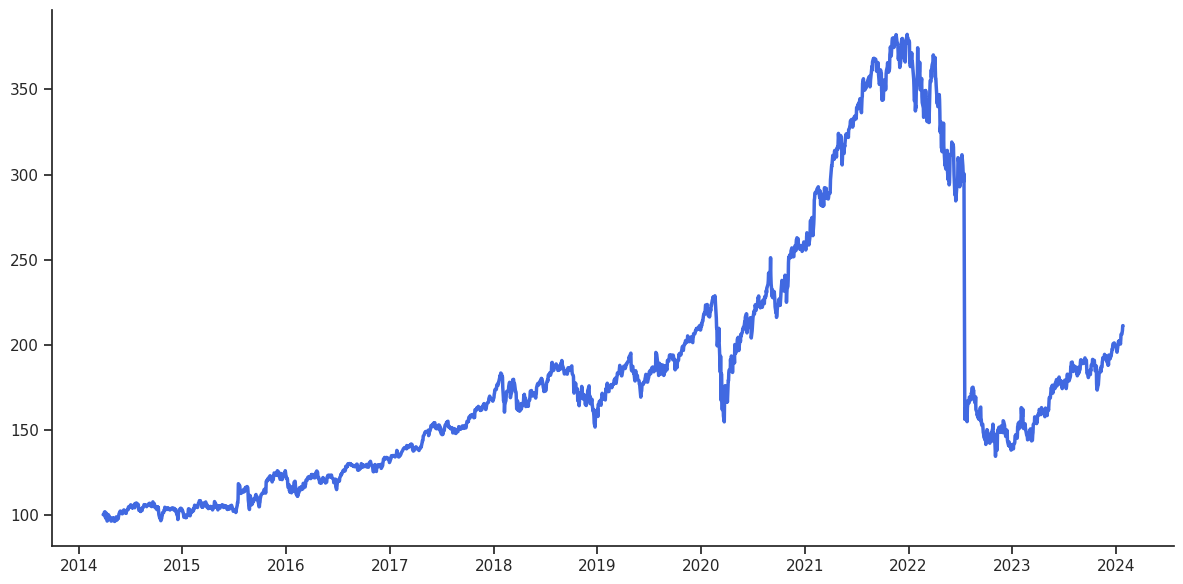

Sharpe Ratio: 0.3316660691474757
Max Drawdown: -0.6478686282397983
PnL: 1.1135266711692888
Beta: nan


In [23]:
test_portfolio.backtest(Backtest())

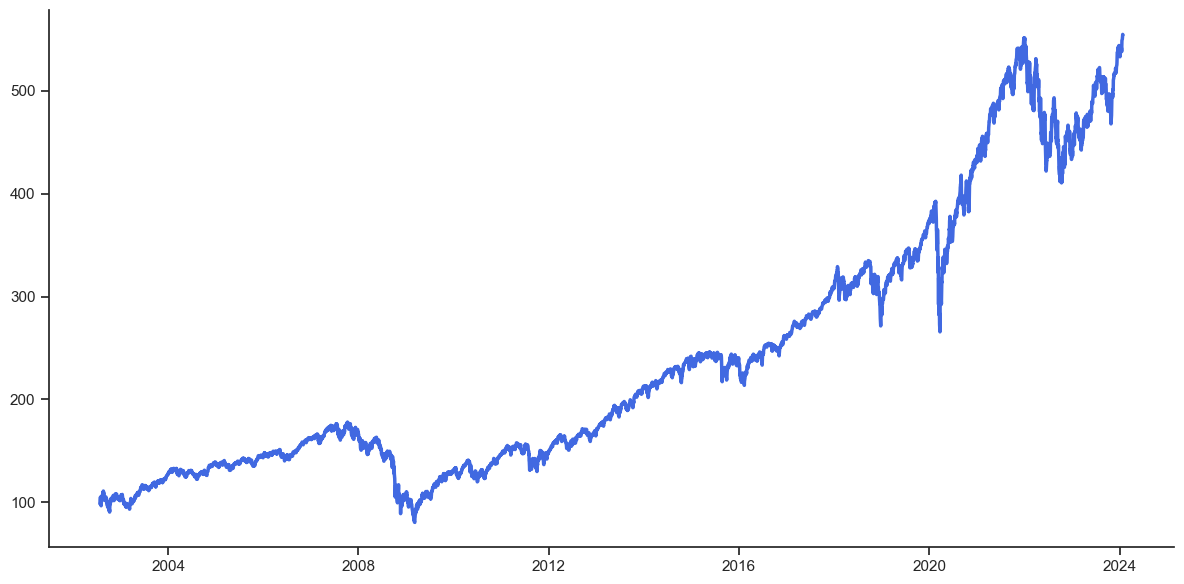

Sharpe Ratio: 0.3429935492343667
Max Drawdown: -0.5475529267280812
PnL: 4.544103474142241
Beta: nan


In [58]:
MVO.backtest(Backtest(MVO.generate_weights()))

In [3]:
!pip install cvxpy

  Obtaining dependency information for cvxpy from https://files.pythonhosted.org/packages/e4/f7/900f90efc5f5c023a24734dbcd58cf1f024f92f2897b5e1556d1daf92ae1/cvxpy-1.4.2-cp39-cp39-macosx_10_9_universal2.whl.metadata
  Using cached osqp-0.6.3.tar.gz (228 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ecos-2.0.12.tar.gz (142 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for clarabel>=0.5.0 from https://files.pythonhosted.org/packages/55/1e/16864d79381d95d5c1eea427295b8d927c7964f1b5a388ad8c3d5b75ab3a/clarabel-0.6.0-cp37-abi3-macosx_10_9_x86_64.macosx_11_0_arm64.macosx_10_9_universal2.whl.metadata
  Using cached clarabel-0.6.0-cp37-abi3-macosx_10_9_x86_64.macosx_11_0_arm64.macosx_10_9_universal2.whl.metadata (4.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [36]:
import cvxpy as cp
import numpy as np
import pandas as pd
import math

In [34]:
df = pd.read_csv("../data/{}.csv".format("snp500"))
date_series = df["datadate"]
price = df["prccd"]
ret_df = pd.DataFrame({"date" : date_series, "snp500" : price})

df1 = pd.read_csv("../data/{}.csv".format("us_bonds"))
date_series1 = df1["datadate"]
price1 = df1["prccd"]
ret_df1 = pd.DataFrame({"date" : date_series1, "us_bonds" : price1})

df = pd.merge(ret_df, ret_df1, how = "inner", on = "date")
df['date'] = pd.to_datetime(df['date'])

# Filter the DataFrame based on the condition
df = df[(df['date'] >= '2006-12-11') & (df['date'] <= '2007-01-11')]
columns_to_apply = ['snp500', 'us_bonds']

# Apply the function to specific columns using df.apply
df[columns_to_apply] = df[columns_to_apply].apply(np.log).diff();
expected_returns = df.mean() * 252
covariance_matrix = df.cov().to_numpy()

/var/folders/n8/lng25n9n2jz_8p1k4d3j317m0000gn/T/ipykernel_59156/2366753029.py:20: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  expected_returns = df.mean() * 252
/var/folders/n8/lng25n9n2jz_8p1k4d3j317m0000gn/T/ipykernel_59156/2366753029.py:21: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov().to_numpy()


In [41]:
def efficient_portfolio_generation(max_return, increment):
    returns_min_annualized = -1.00
    num_iterations = (int) ((max_return - returns_min_annualized) / increment)
    efficient_portfolio_returns = np.empty((num_iterations,))
    efficient_portfolio_volatilities = np.empty((num_iterations,))
    max_index = num_iterations
    sharpe_ratios = pd.DataFrame()
    index = 0
    for iter in range(num_iterations):
      w = cp.Variable(2)

      obj = cp.Minimize(w.T @ covariance_matrix @ w)
      const = [
          cp.sum(w) == 1, w >= 0, w.T @ expected_returns == returns_min_annualized
      ]
      prob = cp.Problem(obj, const)
      opt_v = prob.solve()
      if (math.isinf(opt_v)):
        max_index -= 1
        efficient_portfolio_returns.resize((max_index,))
        efficient_portfolio_volatilities.resize((max_index,))
      else:
        risk_opt = (opt_v * 252) ** 0.5
        w_opt = w.value
        efficient_portfolio_returns[index] = returns_min_annualized
        efficient_portfolio_volatilities[index] = risk_opt
        sharpe_ratio = (returns_min_annualized - 0.03) / risk_opt
        sharpe_ratios[iter] = [returns_min_annualized, risk_opt, sharpe_ratio, w_opt]
        index += 1
      returns_min_annualized += increment
    return [efficient_portfolio_returns, efficient_portfolio_volatilities, sharpe_ratios]


[efficient_portfolio_returns, efficient_portfolio_volatilities, sharpe_ratios] = efficient_portfolio_generation(1.00, 0.02)
sharpe_ratios = sharpe_ratios.rename(index={0: 'Returns', 1: 'Risk', 2: 'Sharpe Ratio', 3: 'Weights'})

# get the weights, returns and risk of portfolio that has the highest sharpe ratio
market_portfolio = sharpe_ratios[sharpe_ratios.loc['Sharpe Ratio'].astype(float).idxmax()]
market_portfolio

Returns                                              0.08
Risk                                             0.061389
Sharpe Ratio                                     0.814475
Weights         [0.9608492524803065, 0.03915074751969351]
Name: 54, dtype: object